In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import re
import openpyxl
import nbformat
import ipykernel
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics, preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

In [7]:
df = pd.read_excel(r"C:\Users\maserati\Desktop\Master_Maserati\M2\0- Mémoire Porjet M2\Données\base_tx_chomage.xlsx", sheet_name="Feuil2")
df.head()

,Time period,France,Germany,Greece,Italy,Spain,United Kingdom
0,1991-Jan,9.2,5.2,7.57,8.7,15.1,7.5
1,1991-Feb,9.3,5.2,7.68,8.6,15.1,7.7
2,1991-Mar,9.3,5.3,7.79,8.6,15.1,8.1
3,1991-Apr,9.4,5.3,7.90,8.5,15.2,8.3
4,1991-May,9.4,5.3,8.01,8.5,15.3,8.5


In [8]:
print("TOTAL MONTHS OF DATA:",len(data))

TOTAL MONTHS OF DATA: 411


In [12]:
# Conversion de la colonne de date en format datetime
df['Time period'] = pd.to_datetime(df['Time period'], format="mixed")

In [14]:


# Liste des pays
countries = ['France', 'Germany', 'Greece', 'Italy', 'Spain', 'United Kingdom']

# Extraction des années utiles
df['Year'] = df['Time period'].dt.year
data_filtered = df[(df['Year'] >= 1991) & (df['Year'] <= 2025)].copy()

summary = []
for country in countries:
    series = data_filtered[country].dropna()
    total_len = len(series)


    stats = {
        "Pays": country,
        "Sample size": total_len,
        "Max value": round(series.max(), 2),
        "Min value": round(series.min(), 2),
        "Mean": round(series.mean(), 2),
        "Median": round(series.median(), 2),
        "Standard deviation": round(series.std(), 2),
        "Variance": round(series.var(), 2)
    }
    summary.append(stats)

# DataFrame final
summary_df = pd.DataFrame(summary)
summary_df.set_index("Pays", inplace=True)

# Display the summary dataframe
print("Statistiques descriptives par pays:")
display(summary_df)


Statistiques descriptives par pays:


,Sample size,Max value,Min value,Mean,Median,Standard deviation,Variance
Pays,,,,,,,
France,411,12.5,6.9,9.54,9.2,1.56,2.43
Germany,411,11.2,2.9,6.55,7.0,2.51,6.29
Greece,411,28.3,7.3,13.91,10.8,5.94,35.26
Italy,411,13.3,5.8,9.48,9.4,1.81,3.26
Spain,411,26.4,7.9,16.08,15.8,4.93,24.29
United Kingdom,411,10.7,3.6,6.17,5.5,1.87,3.49


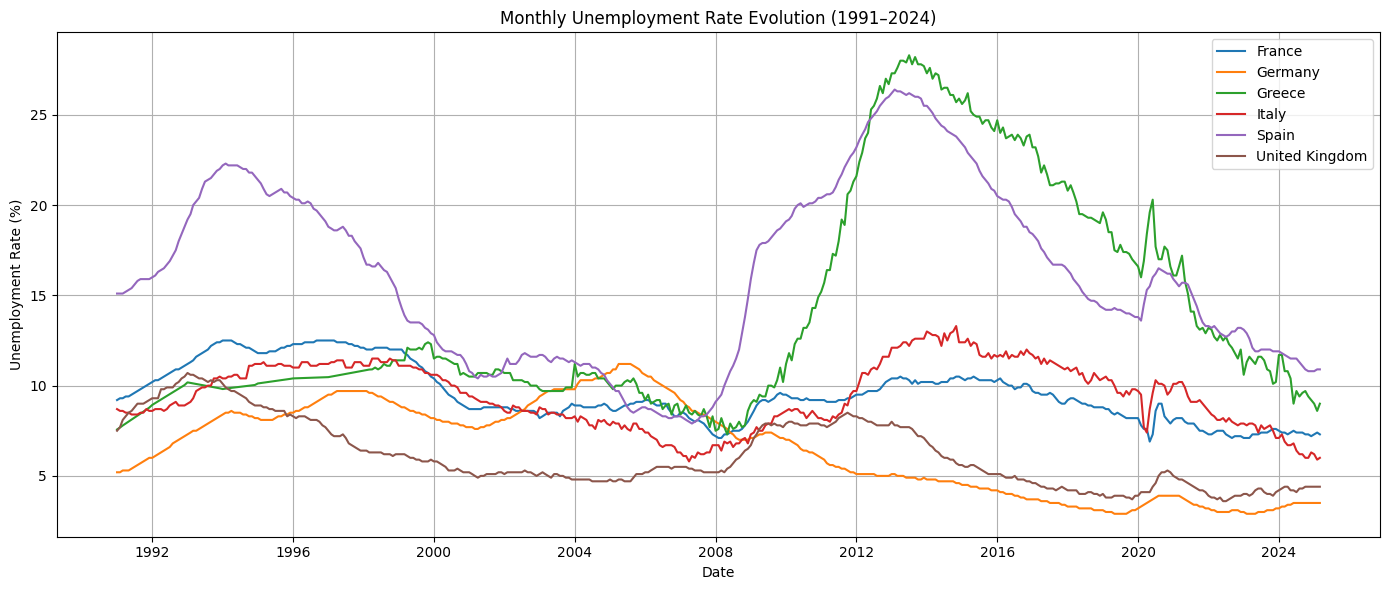

In [15]:
import matplotlib.dates as mdates

# Mise en forme du graphique
plt.figure(figsize=(14, 6))
for country in ['France', 'Germany', 'Greece', 'Italy', 'Spain', 'United Kingdom']:
    plt.plot(df['Time period'], df[country], label=country)

plt.title("Monthly Unemployment Rate Evolution (1991–2024)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Recréer country_pivot
df['Year'] = df['Time period'].dt.year
data_filtered = df[(df['Year'] >= 2010) & (df['Year'] <= 2025)].copy()
countries = ['France', 'Germany', 'Greece', 'Italy', 'Spain', 'United Kingdom']
data_filtered = data_filtered[['Year'] + countries]
data_melted = data_filtered.melt(id_vars='Year', var_name='Country Name', value_name='Unemployment Rate')
country_pivot = data_melted.pivot_table(index='Country Name', columns='Year', values='Unemployment Rate')
country_pivot = country_pivot.sort_values(by=2025, ascending=False)

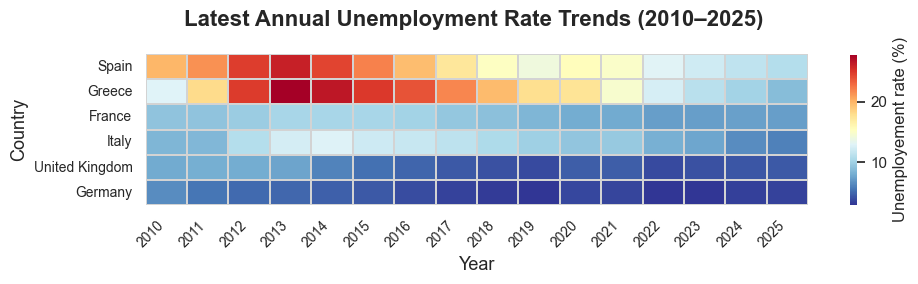

In [18]:
# Style général
sns.set_theme(style="whitegrid")

# Création du heatmap sans annotations internes et avec taille optimisée
plt.figure(figsize=(10, 3))  # taille réduite horizontalement
ax = sns.heatmap(
    country_pivot,
    cmap='RdYlBu_r',        
    annot=False,           
    linewidths=0.1,
    linecolor='lightgrey',
    cbar_kws={
        'label': 'Unemployement rate (%)',
        'orientation': 'vertical',
        'shrink': 0.99
    },
    square=False 
)

# Personnalisation des axes
plt.title('Latest Annual Unemployment Rate Trends (2010–2025) ', fontsize=16, weight='bold', pad=20)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Country", fontsize=13)

# Rotation et ajustement des labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

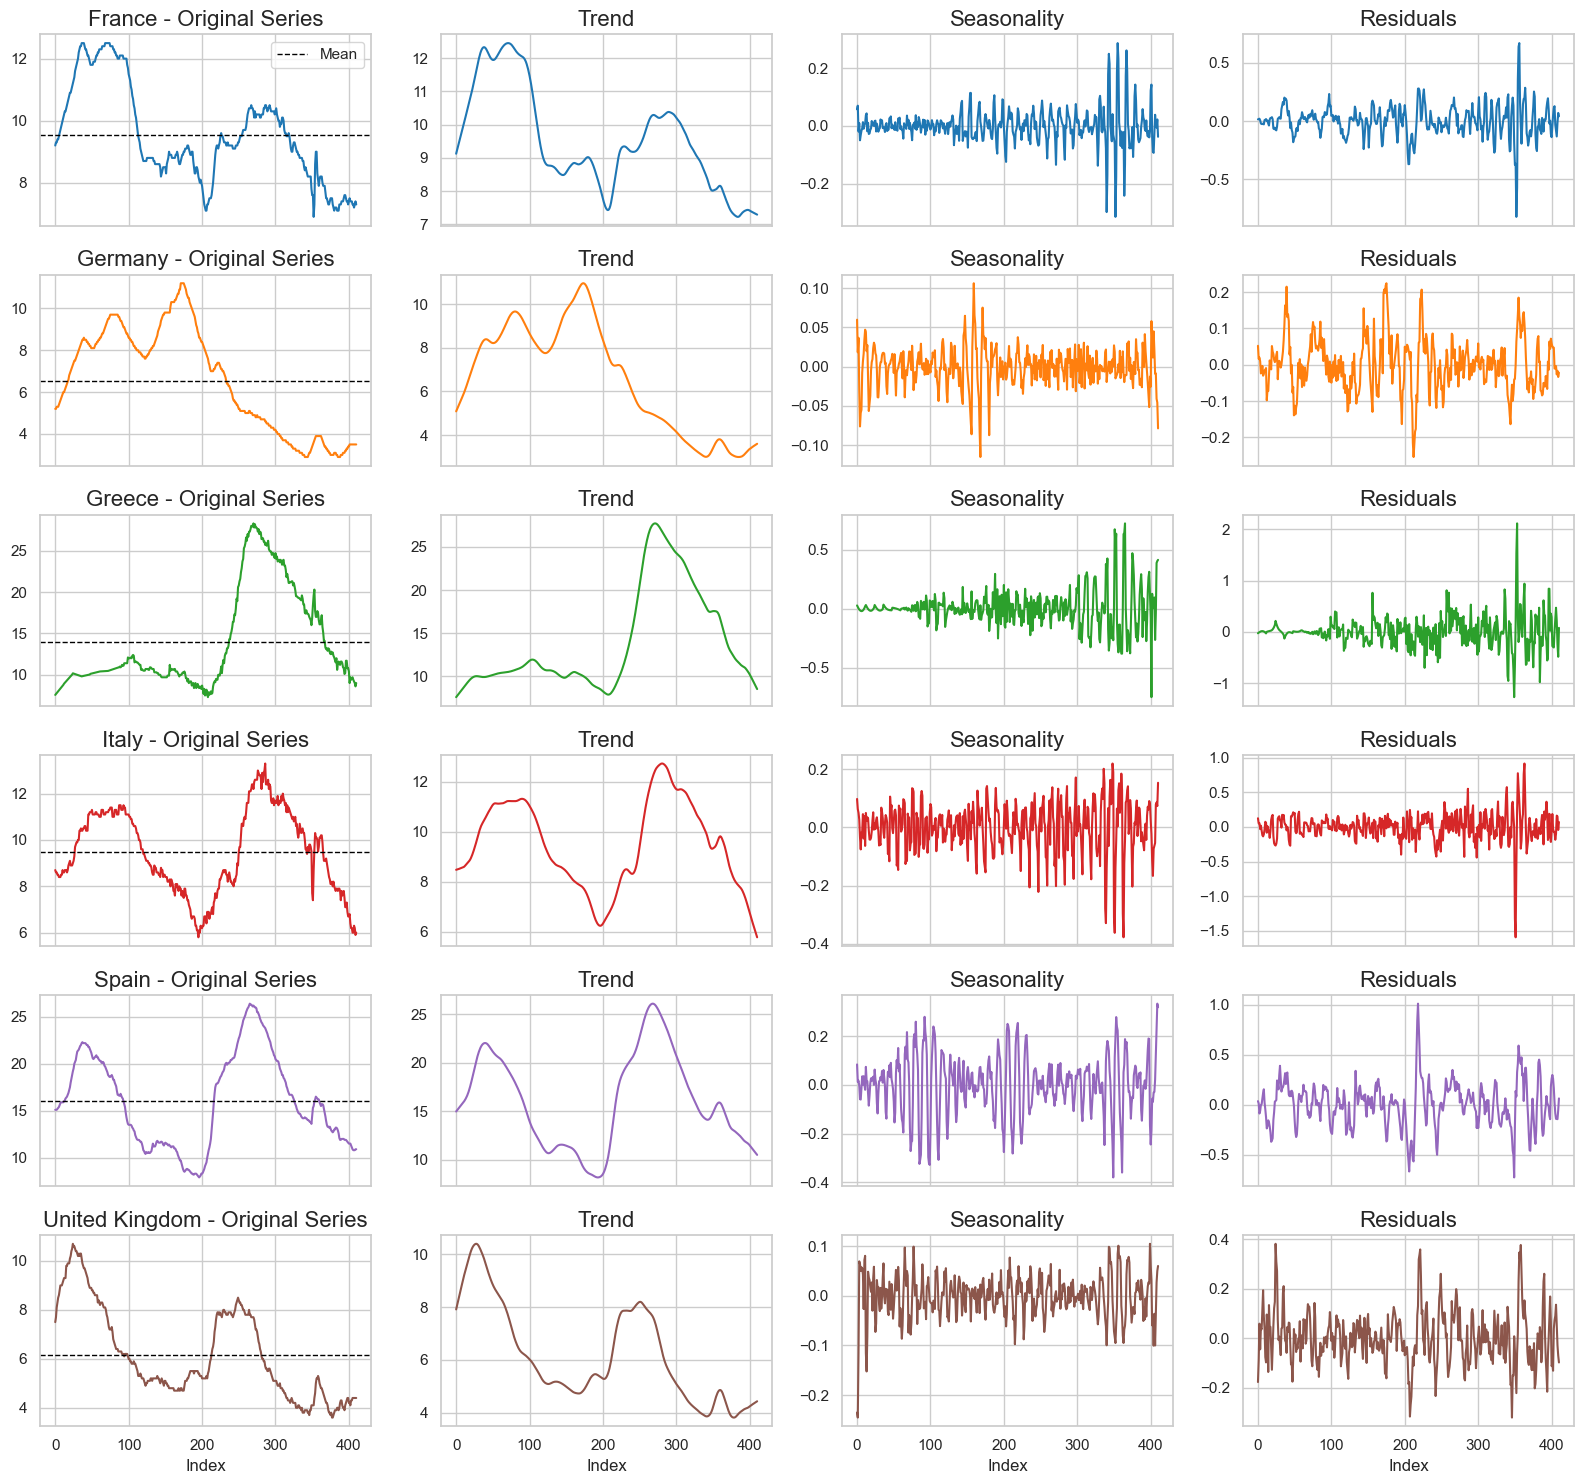

In [19]:
from statsmodels.tsa.seasonal import STL

palette = sns.color_palette("tab10", len(countries))

fig, axes = plt.subplots(len(countries), 4, figsize=(16, 2.5*len(countries)), sharex='col')
for i, country in enumerate(countries):
    stl = STL(df[country], period=12)
    result = stl.fit()
    color = palette[i]
    axes[i, 0].plot(df[country], color=color)
    mean_val = df[country].mean()
    axes[i, 0].axhline(mean_val, color='black', linestyle='--', linewidth=1, label='Mean')
    if i == 0:
        axes[i, 0].legend(loc='upper right')
    axes[i, 0].set_title(f'{country} - Original Series', fontsize=16)
    axes[i, 1].set_title('Trend', fontsize=16)
    axes[i, 2].set_title('Seasonality', fontsize=16)
    axes[i, 3].set_title('Residuals', fontsize=16)
    axes[i, 1].plot(result.trend, color=color)
    axes[i, 2].plot(result.seasonal, color=color)
    axes[i, 3].plot(result.resid, color=color)
    if i == len(countries)-1:
        for ax in axes[i]:
            ax.set_xlabel('Index')
plt.tight_layout()
plt.show()

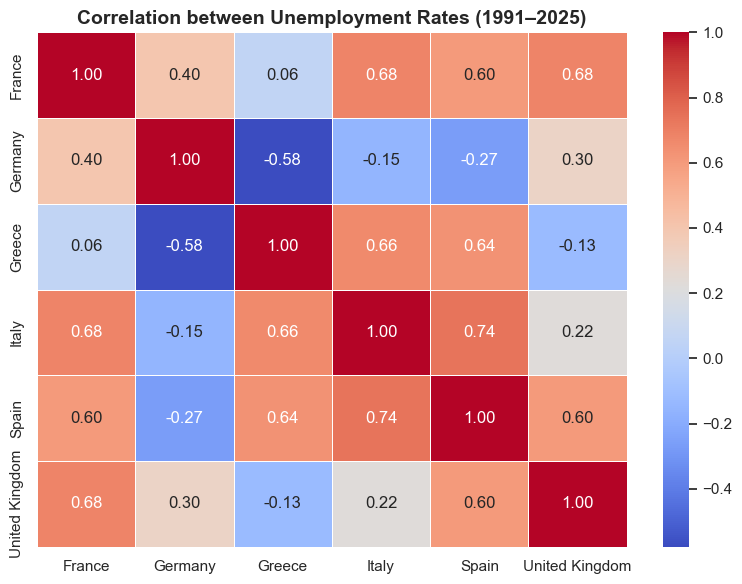

In [20]:
# Select countries
countries = ['France', 'Germany', 'Greece', 'Italy', 'Spain', 'United Kingdom']

# Extract valid data
correlation_data = data[countries].dropna()

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Unemployment Rates (1991–2025)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [21]:
# Transformation en format long
df_long = df.melt(id_vars=['ds'], value_vars=['France', 'Germany', 'Greece', 'Italy', 'Spain', 'United Kingdom'],
                  var_name='country', value_name='y')

In [23]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

df_prophet_ready = df_long.dropna()

# Fonction de test ADF par pays
def adf_test_by_country(df):
    results = []
    for country in df['country'].unique():
        series = df[df['country'] == country].sort_values('ds')['y']
        result = adfuller(series)
        results.append({
            'Pays': country,
            'Statistique ADF': round(result[0], 3),
            'p-value': round(result[1], 3),
            'Seuil critique 1%': result[4]['1%'],
            'Seuil critique 5%': result[4]['5%'],
            'Seuil critique 10%': result[4]['10%'],
            'Stationnaire (p < 0.05)': result[1] < 0.05
        })
    return pd.DataFrame(results)

# Application sur ton DataFrame long
adf_results = adf_test_by_country(df_prophet_ready)

# Affichage propre
print("\n📊 Résultats du test ADF par pays\n")
print(adf_results.to_string(index=False))


📊 Résultats du test ADF par pays

          Pays  Statistique ADF  p-value  Seuil critique 1%  Seuil critique 5%  Seuil critique 10%  Stationnaire (p < 0.05)
        France           -1.321    0.619          -3.446681          -2.868739           -2.570605                    False
       Germany           -1.164    0.689          -3.446560          -2.868685           -2.570576                    False
        Greece           -1.990    0.291          -3.447057          -2.868904           -2.570693                    False
         Italy           -1.595    0.486          -3.446930          -2.868848           -2.570663                    False
         Spain           -2.080    0.252          -3.446722          -2.868757           -2.570614                    False
United Kingdom           -2.157    0.222          -3.446804          -2.868793           -2.570634                    False
